# Geocoding without Google API

Geocoding is the process of determining geographic coordinates for place names, street addresses, and codes (e.g., zip codes). Many organizations use Google API to geocode as a part of the data cleaning process. Many students (just like me) who want to geocode, may not be comfortable in spending money out of their pocket to get the coordinates for 50 different locations. To overcome this issue, I have designed an R Program that performs web scraping to obtain the coordinates for desired locations. The web scraping was performed on the [Geoplaner](https://www.geoplaner.com/) website. 

After obtaining the latitude and longitude, I used the ggplot2 library to plot those locations. I did not use the leaflet library because the map does not render once the notebook is uploaded on GitHub.

In R, there are 2 main libraries for geocoding that are:
- rvest
- RSelenium

rvest helps you to read an HTML page and extract elements from it. However, we cannot interact with java using the rvest library. RSelenium allows us to have a web browser that is controlled by our code. Since the Geoplaner website uses javascript so RSelenium was used primarily.  

## Loading the required libraries

In [1]:
library(RSelenium) 
library(dplyr)
library(rvest)
library(stringr)
library(ggplot2)
library(ggthemes)
library(ggrepel)
library(maps)
library(geosphere)

Warning message:
"package 'RSelenium' was built under R version 3.6.3"
Warning message:
"package 'dplyr' was built under R version 3.6.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'ggthemes' was built under R version 3.6.3"
Warning message:
"package 'ggrepel' was built under R version 3.6.3"
Warning message:
"package 'geosphere' was built under R version 3.6.3"


## Entering the name of locations for which the coordinates are required

In [2]:
a = c("Wichita", "Delhi", "Dhaka", "Berlin", "Chandigarh", "Milan", "Oslo", "Edinburgh", "Sao Paulo", "Melbourne", "Macau", "Anchorage")

## Establishing a connection with a Selenium Server

In [3]:
remDr = rsDriver(port= sample(1000:9999, 1),
                 chromever = "93.0.4577.63")
remDr <- remDr[["client"]]

checking Selenium Server versions:

BEGIN: PREDOWNLOAD

BEGIN: DOWNLOAD

BEGIN: POSTDOWNLOAD

checking chromedriver versions:

BEGIN: PREDOWNLOAD

BEGIN: DOWNLOAD

BEGIN: POSTDOWNLOAD

checking geckodriver versions:

BEGIN: PREDOWNLOAD

BEGIN: DOWNLOAD

BEGIN: POSTDOWNLOAD

checking phantomjs versions:

BEGIN: PREDOWNLOAD

BEGIN: DOWNLOAD

BEGIN: POSTDOWNLOAD



[1] "Connecting to remote server"
$acceptInsecureCerts
[1] FALSE

$browserName
[1] "chrome"

$browserVersion
[1] "93.0.4577.63"

$chrome
$chrome$chromedriverVersion
[1] "93.0.4577.63 (ff5c0da2ec0adeaed5550e6c7e98417dac77d98a-refs/branch-heads/4577@{#1135})"

$chrome$userDataDir
[1] "C:\\Users\\dpnsh\\AppData\\Local\\Temp\\scoped_dir26496_1036119191"


$`goog:chromeOptions`
$`goog:chromeOptions`$debuggerAddress
[1] "localhost:59065"


$networkConnectionEnabled
[1] FALSE

$pageLoadStrategy
[1] "normal"

$platformName
[1] "windows"

$proxy
named list()

$setWindowRect
[1] TRUE

$strictFileInteractability
[1] FALSE

$timeouts
$timeouts$implicit
[1] 0

$timeouts$pageLoad
[1] 300000

$timeouts$script
[1] 30000


$unhandledPromptBehavior
[1] "dismiss and notify"

$`webauthn:extension:credBlob`
[1] TRUE

$`webauthn:extension:largeBlob`
[1] TRUE

$`webauthn:virtualAuthenticators`
[1] TRUE

$webdriver.remote.sessionid
[1] "1dc47dbfbe6cf6a7716c055a68bea138"

$id
[1] "1dc47dbfbe6cf6a7716c055a68bea

## Navigating to the URL

In [4]:
remDr$navigate("https://www.geoplaner.com/")

In [5]:
Latlist = list() # Creating an empty list to store all the latitudes
Longlist = list() # Creating an empty list to store all the longitudes

web_place = remDr$findElement(using = "class", value = "e80adr") # Finding the css element where the locations will be entered on the geoplaner website

In [6]:
for (val in 1:length(a)) {
  aa = web_place$sendKeysToElement(list(paste(a)[val], key="enter")) # Once the location is entered, enter command is executed 
  source <- remDr$getPageSource() #web page source
  
  locn =  read_html(as.character(source)) %>% html_nodes("#dt") %>% html_text() # reading the webpage as the HTML
  
     
  Latlist[val] = strsplit(strsplit(locn, " +")[[1]][8],"°")[[1]][1] #Extracting the latitudes
  Longlist[val] = strsplit(strsplit(locn, " +")[[1]][9],"°")[[1]][1] #Extracting the longitudes
  
  web_place$clearElement() #clear the input area so that the next location can be entered
  Sys.sleep(5) #Allowing system enough time to reload the page after each execution
}

  source <- remDr$getPageSource() #web page source
  aa = web_place$sendKeysToElement(list(paste(a)[length(a)], key="enter"))
  locn =  read_html(as.character(source)) %>% html_nodes("#dt") %>% html_text() 
  Latlist = append(Latlist,strsplit(strsplit(locn, " +")[[1]][8],"°")[[1]][1])
  Longlist = append(Longlist,strsplit(strsplit(locn, " +")[[1]][9],"°")[[1]][1])


## Creating a Dataframe of the locations and their corresponding Latitudes and Longitudes

In [7]:
df = data.frame(Location = c(a[2:length(a)], a[1]), 
                Latitude = as.numeric(c(unlist(Latlist)[3:length(Latlist)],unlist(Latlist)[2])),
                Longitude = as.numeric(c(unlist(Longlist)[3:length(Longlist)],unlist(Longlist)[2])))

df

Location,Latitude,Longitude
Delhi,28.65172,77.22194
Dhaka,23.78620,90.40262
Berlin,52.51704,13.38886
Chandigarh,30.73344,76.77971
Milan,45.46680,9.19050
Oslo,59.91333,10.73897
Edinburgh,55.95190,-3.19042
Sao Paulo,-23.55065,-46.63338
Melbourne,-37.81422,144.96316
Macau,22.17576,113.55141


## Creating a World map

In [8]:
states_map <-map_data("world")

World_map = ggplot() + 
  geom_map(data = states_map, 
           map = states_map,aes(x = long, y = lat, map_id = region, group = group),
           fill = "antiquewhite", color = "black", size = 0.1)+coord_cartesian(ylim = c(-50, 90)) 

Warning message:
"Ignoring unknown aesthetics: x, y"


## Plotting the locations on the map

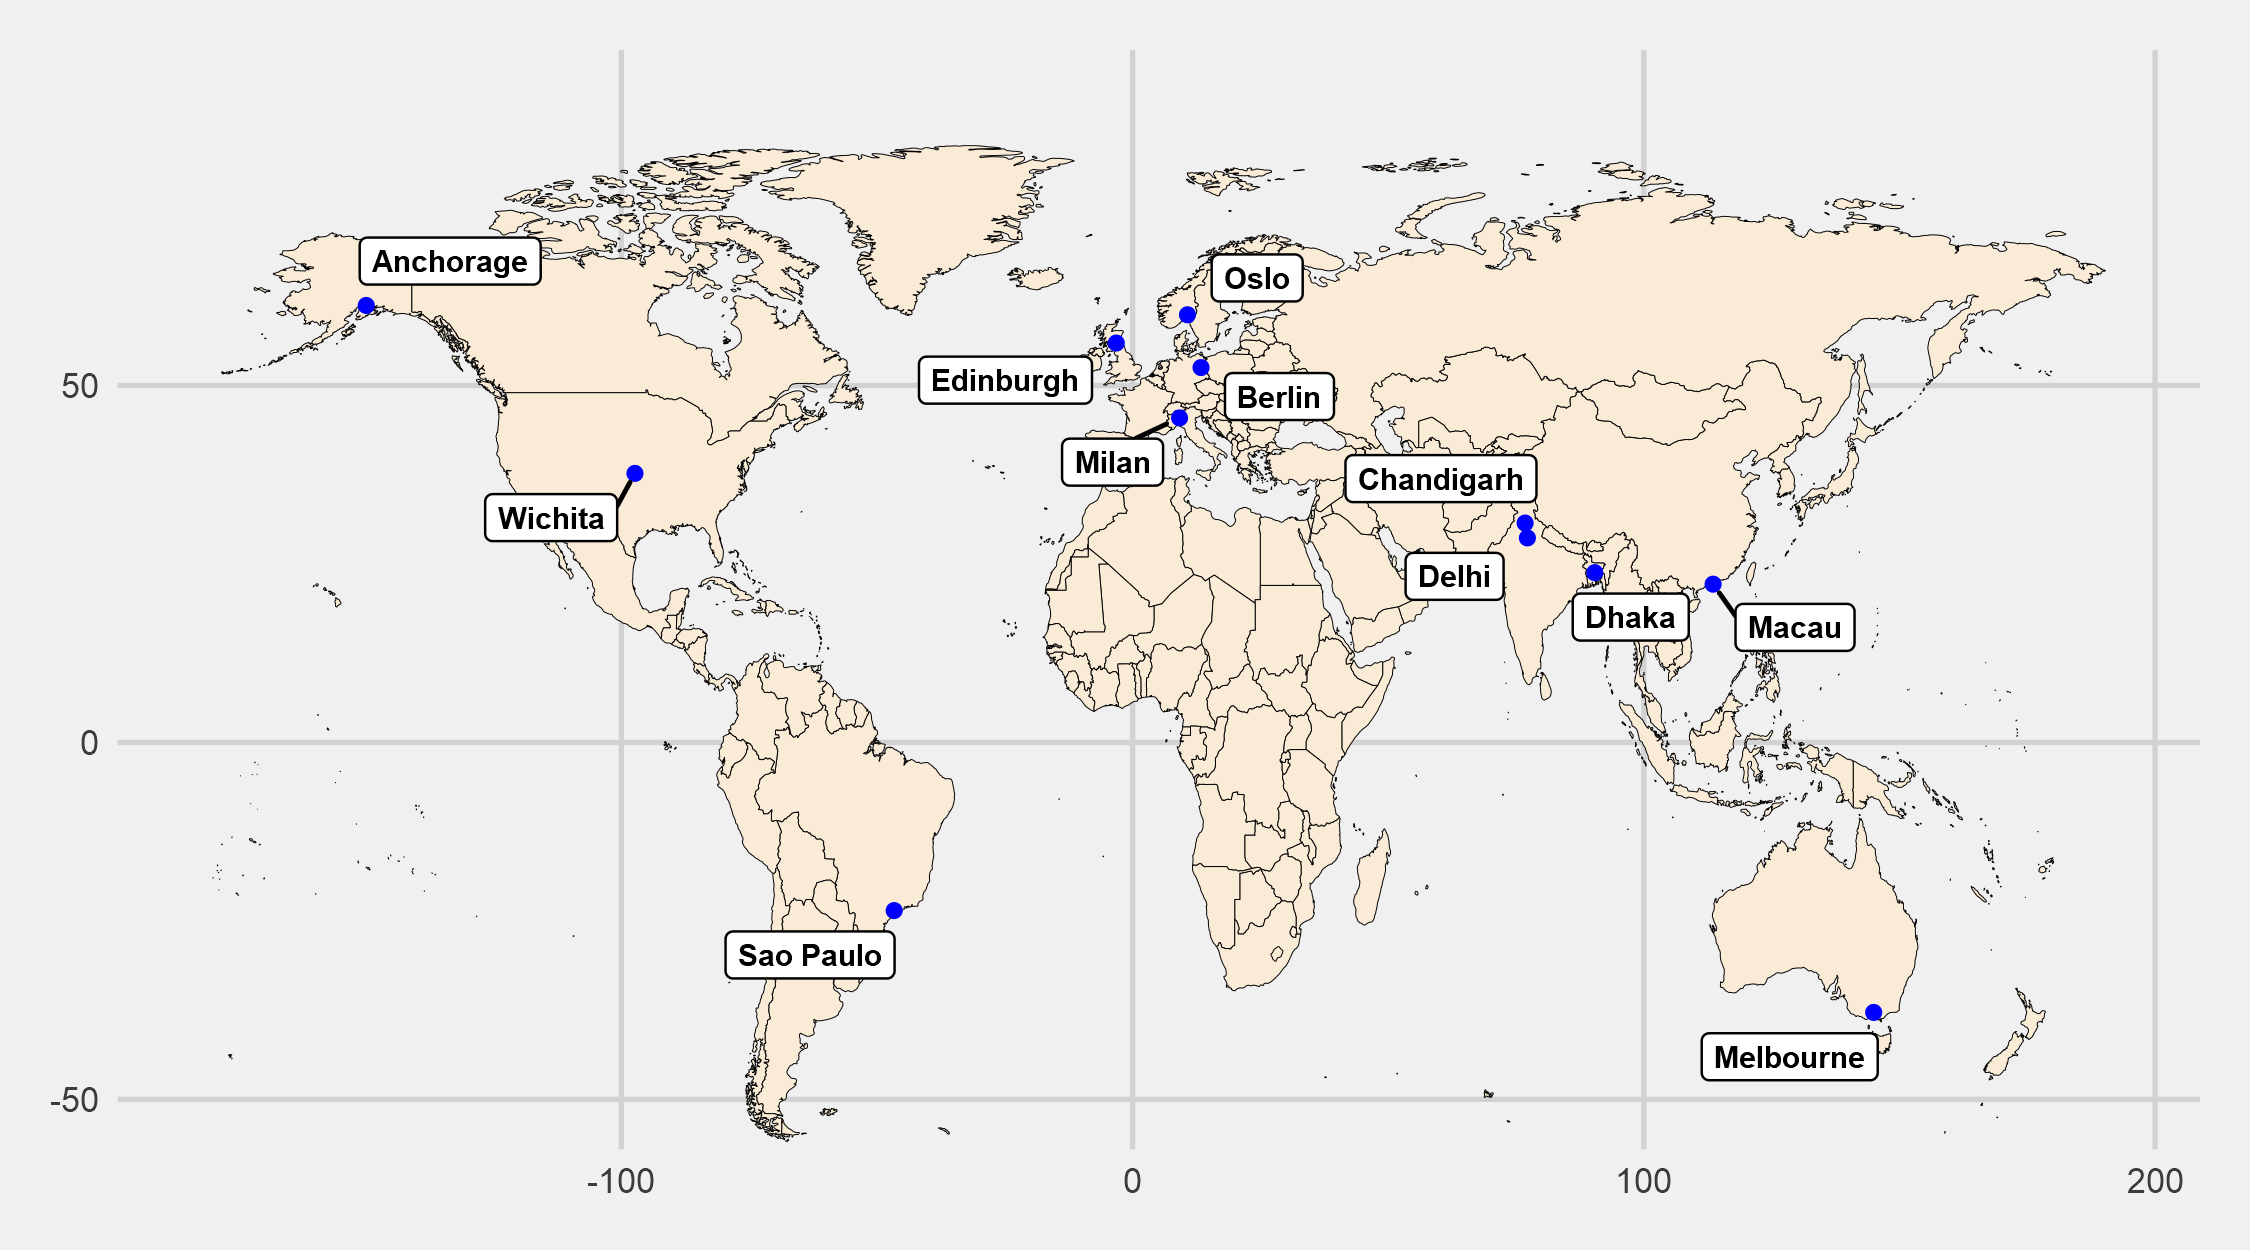

In [9]:
options(repr.plot.width=9, repr.plot.height=5,repr.plot.res = 250) #Defining the picture size and resolution
World_map + 
  geom_point(data=df,aes(x=Longitude,y=Latitude),size=1.4,color='blue',alpha=1.3) + 
  geom_label_repel(data=df,aes(x=Longitude,y=Latitude,label= Location),
                   size=3,
                   fontface = 'bold', 
                   color = 'black',
                   box.padding = unit(0.35, "lines"),
                   point.padding = unit(0.5, "lines"),
                   segment.color = 'black',alpha=1) +
  theme_fivethirtyeight() + 
  theme(legend.position='none') 

**- Deepansh Arora**